In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#Procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer


# Validación
from sklearn.model_selection import StratifiedKFold

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Metricas
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('water_potability_90.csv')

In [4]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

In [51]:
df.iloc[2,:]

ph                     6.001382
Hardness             186.884422
Solids             22554.830087
Chloramines            8.391883
Sulfate              331.214867
Conductivity         444.891044
Organic_carbon         4.466772
Trihalomethanes       65.954766
Turbidity              4.036720
Potability             0.000000
Name: 2, dtype: float64

In [52]:
datos = [input("Ingresa ph (6)"),
input("Ingresa Hardness (186)"),
input("Ingresa Solids (22554)"),
input("Ingresa Chloramines (8.3)"),
input("Ingresa Sulfate (331)"),
input("Ingresa Conductivity (444)"),
input("Ingresa Organic_carbon (4.4)"),
input("Ingresa Trihalomethanes (65.95)"),
input("Ingresa Turbidity (4)")]
datos = [float(i) for i in datos]
patron = np.array(datos)
patron

Ingresa ph (6) 1
Ingresa Hardness (186) 1
Ingresa Solids (22554) 1
Ingresa Chloramines (8.3) 1
Ingresa Sulfate (331) 1
Ingresa Conductivity (444) 1
Ingresa Organic_carbon (4.4) 1
Ingresa Trihalomethanes (65.95) 1
Ingresa Turbidity (4) 1


array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

<AxesSubplot:ylabel='Solids'>

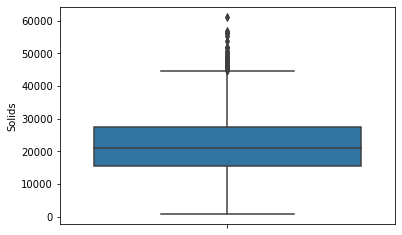

In [38]:
sns.boxplot(y = df.Solids)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2642 non-null   float64
 1   Hardness         3112 non-null   float64
 2   Solids           3112 non-null   float64
 3   Chloramines      3112 non-null   float64
 4   Sulfate          2375 non-null   float64
 5   Conductivity     3112 non-null   float64
 6   Organic_carbon   3112 non-null   float64
 7   Trihalomethanes  2958 non-null   float64
 8   Turbidity        3112 non-null   float64
 9   Potability       3112 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 243.2 KB


In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2642.000000,3112.000000,3112.000000,3112.000000,2375.000000,3112.000000,3112.000000,2958.000000,3112.000000,3112.000000
mean,7.087739,196.414009,22020.397113,7.119341,333.527388,425.682740,14.262298,66.403632,3.964717,0.390103
std,1.584737,32.894087,8771.074019,1.575529,41.324153,80.809856,3.305670,16.167713,0.778956,0.487852
min,0.227499,47.432000,728.750830,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.098048,176.804784,15670.407869,6.127421,307.659787,365.241762,12.033868,55.776857,3.440160,0.000000
50%,7.051591,197.123423,20927.833607,7.133077,332.890382,421.884968,14.186549,66.668069,3.949117,0.000000
75%,8.057325,216.674288,27346.966570,8.109544,359.471353,481.324545,16.525253,77.368767,4.497815,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.isnull().sum()

ph                 470
Hardness             0
Solids               0
Chloramines          0
Sulfate            737
Conductivity         0
Organic_carbon       0
Trihalomethanes    154
Turbidity            0
Potability           0
dtype: int64

In [12]:
df["Potability"].value_counts(normalize=True) #Más no potable que potable

0    0.609897
1    0.390103
Name: Potability, dtype: float64

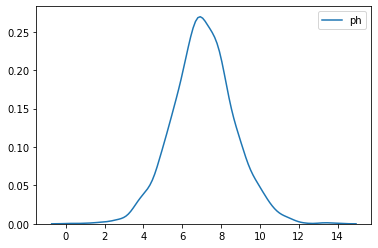

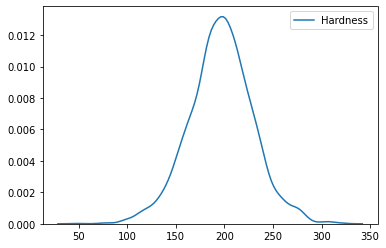

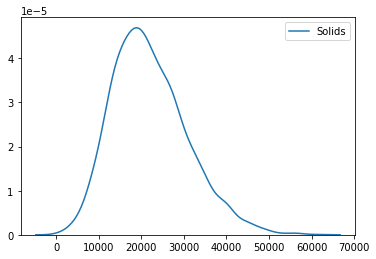

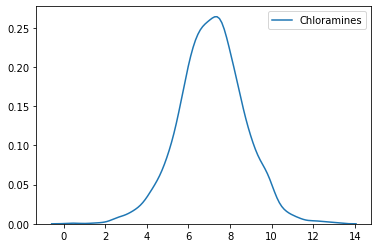

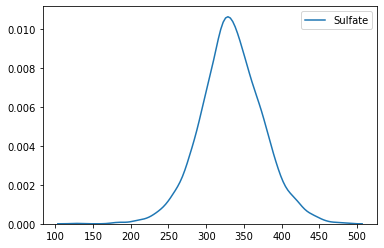

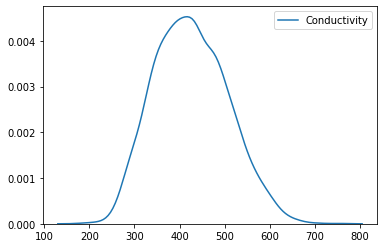

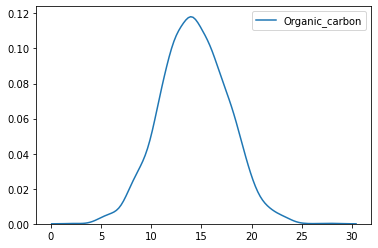

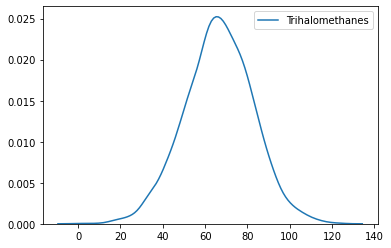

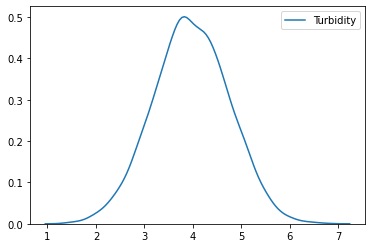

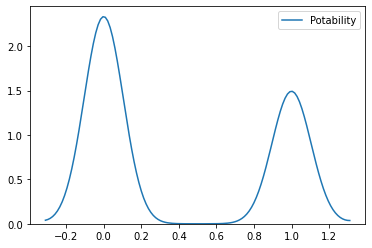

In [13]:
for i in df:
    sns.kdeplot(df[i])
    plt.show()

[]

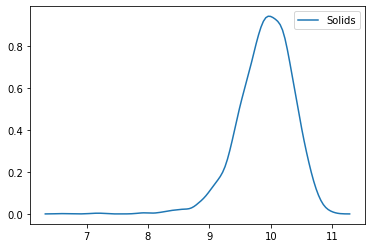

In [14]:
#sns.kdeplot(df["Solids"])
sns.kdeplot(np.log(df["Solids"]))
plt.plot()

In [15]:
df["Solids"] = np.log(df["Solids"])

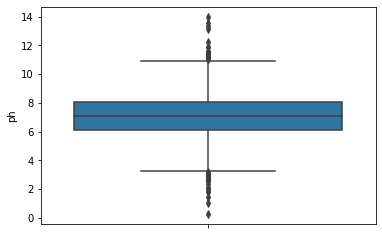

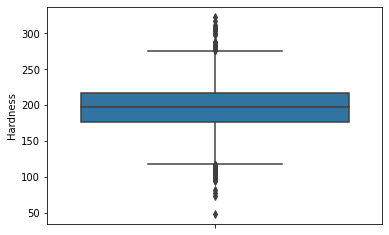

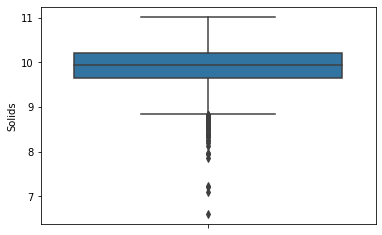

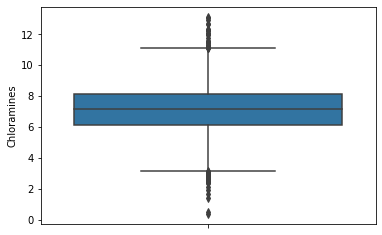

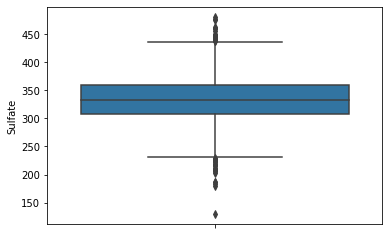

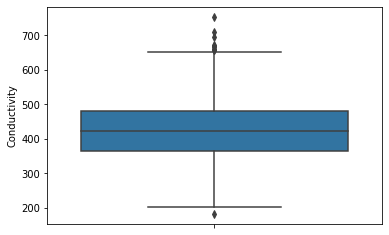

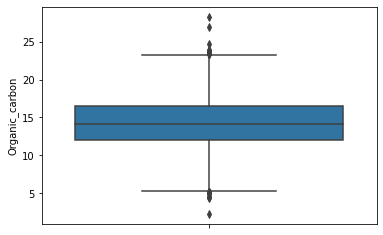

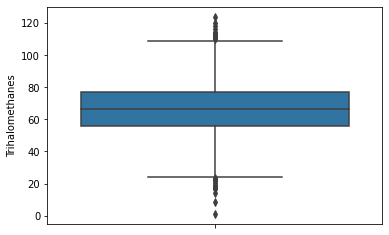

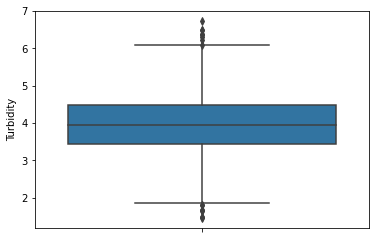

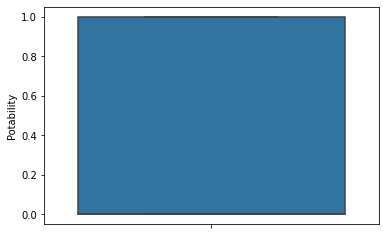

In [16]:
for i in df:
    sns.boxplot(y = df[i])
    plt.show()

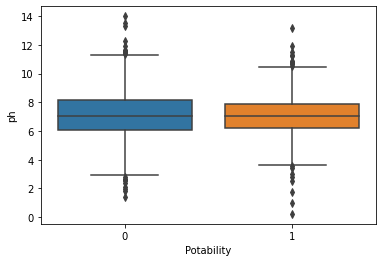

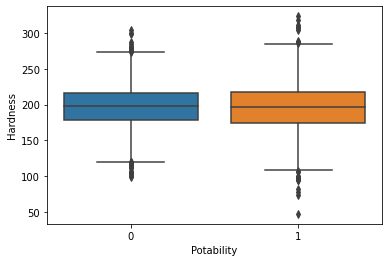

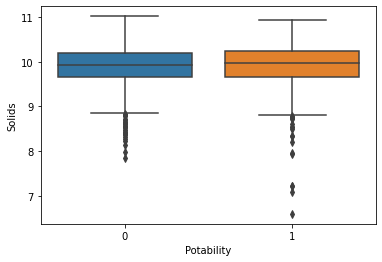

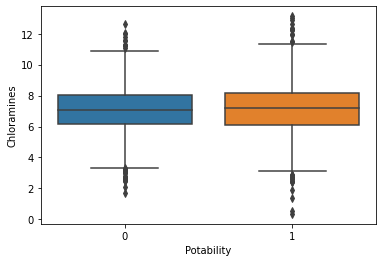

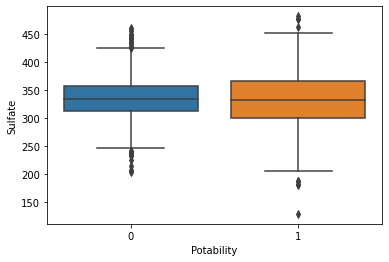

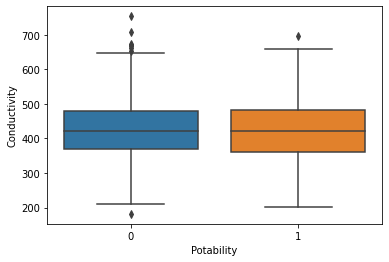

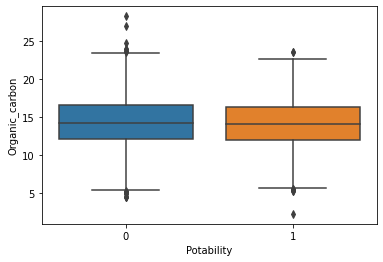

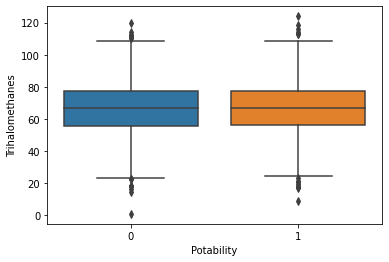

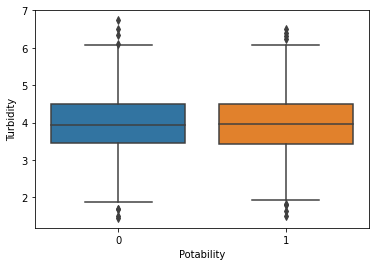

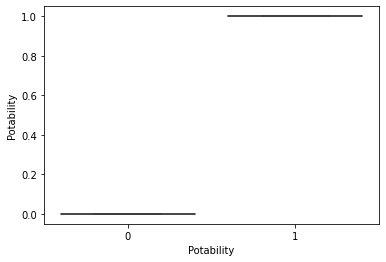

In [10]:
for i in df:
    sns.boxplot(y = df[i],x = df["Potability"])
    plt.show()

In [17]:
imputer = KNNImputer(n_neighbors=9)
imputer.fit(df)
resultado = imputer.transform(df)
resultado

array([[  8.86032424, 233.62514504,   9.88074589, ...,  25.06190431,
          2.47667442,   0.        ],
       [  6.54228179, 146.0553835 ,  10.49032223, ...,  54.12734215,
          3.79405543,   1.        ],
       [  6.00138244, 186.88442213,  10.02370452, ...,  65.95476556,
          4.03671976,   0.        ],
       ...,
       [  9.16099754, 241.3830971 ,  10.24604428, ...,  48.25957164,
          3.54252779,   1.        ],
       [  4.80115437, 180.77287076,   9.51463871, ...,  62.02818652,
          4.41863813,   0.        ],
       [  5.96130157, 182.10899502,  10.08272431, ...,  58.17482529,
          4.91958505,   0.        ]])

In [18]:
df = pd.DataFrame(resultado, columns = df.columns)
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.860324,233.625145,9.880746,6.519063,332.282383,285.412436,13.093262,25.061904,2.476674,0.0
1,6.542282,146.055383,10.490322,8.578678,357.161951,474.007715,21.366387,54.127342,3.794055,1.0
2,6.001382,186.884422,10.023705,8.391883,331.214867,444.891044,4.466772,65.954766,4.036720,0.0
3,6.947029,168.879539,9.772241,6.409476,387.299907,372.022817,15.198191,74.007373,2.600188,0.0
4,8.655299,222.268793,9.523453,7.271299,348.618844,460.870647,18.016760,72.428205,4.588758,1.0
5,7.743095,213.000218,9.984490,6.901041,329.218085,383.747883,11.793246,57.345645,3.242545,1.0
6,7.159053,161.478710,10.150029,10.189528,367.596397,330.550453,15.447842,51.188317,4.291669,1.0
7,3.841205,186.917765,9.902920,7.174952,307.291365,483.334209,13.422802,74.381701,3.635635,0.0
8,8.091812,200.973301,10.183869,6.725680,347.431903,432.189931,13.798655,32.667078,4.370031,0.0
9,10.202972,211.963404,9.985480,7.491895,332.696115,395.140783,21.520593,62.659460,3.270904,0.0


In [19]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [20]:
X = df.drop("Potability",axis=1).values
y = df["Potability"].values

In [21]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[0.62681609, 0.67536651, 0.74236131, ..., 0.41736637, 0.19733498,
        0.19411503],
       [0.45850661, 0.35773031, 0.87993168, ..., 0.73434431, 0.43313708,
        0.44319445],
       [0.41923275, 0.50582687, 0.77462449, ..., 0.0868495 , 0.5290906 ,
        0.48907539],
       ...,
       [0.64864751, 0.70350644, 0.82480256, ..., 0.22685742, 0.38553302,
        0.3956377 ],
       [0.33208604, 0.48365883, 0.65973754, ..., 0.39085701, 0.49723505,
        0.56128533],
       [0.41632254, 0.48850527, 0.78794419, ..., 0.214239  , 0.4659735 ,
        0.6560002 ]])

In [22]:
yhat=[]
ytest=[]

kf = StratifiedKFold(n_splits=10)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    clf = RandomForestClassifier()
    clf = clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.extend(yhat1)
    ytest.extend(y_test)

In [23]:
confusion_matrix(ytest,yhat)

array([[1668,  230],
       [ 815,  399]])

In [25]:
confusion_matrix(ytest,yhat,normalize="true")

array([[0.87881981, 0.12118019],
       [0.67133443, 0.32866557]])

In [28]:
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

         0.0       0.67      0.88      0.76      1898
         1.0       0.63      0.33      0.43      1214

    accuracy                           0.66      3112
   macro avg       0.65      0.60      0.60      3112
weighted avg       0.66      0.66      0.63      3112



In [29]:
f1_score(ytest,yhat, average="macro")

0.5972298373717813

In [51]:
def clasificador(clf,X,y):
    
    yhat=[]
    ytest=[]

    kf = StratifiedKFold(n_splits=5)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = clf.fit(X_train, y_train)
        yhat1 = clf.predict(X_test)
        yhat.extend(yhat1)
        ytest.extend(y_test)
        
        
    return f1_score(ytest,yhat, average="macro")

In [57]:
modelos = {
    "knn_clasificador3":KNeighborsClassifier(3), 
    "knn_clasificador30":KNeighborsClassifier(30), 
    "NCentroid":NearestCentroid(), 
    "NB":GaussianNB(),
    "LR":LogisticRegression(), 
    "SVM_linear": svm.SVC(kernel='linear'),
    "SVM_sigmoid": svm.SVC(kernel='sigmoid'),
    "SVM_poly3": svm.SVC(kernel='poly',degree=2),
    "DecisionTree":DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(50)
    }

In [58]:
modelos

{'knn_clasificador3': KNeighborsClassifier(n_neighbors=3),
 'knn_clasificador30': KNeighborsClassifier(n_neighbors=30),
 'NCentroid': NearestCentroid(),
 'NB': GaussianNB(),
 'LR': LogisticRegression(),
 'SVM_linear': SVC(kernel='linear'),
 'SVM_sigmoid': SVC(kernel='sigmoid'),
 'SVM_poly3': SVC(degree=2, kernel='poly'),
 'DecisionTree': DecisionTreeClassifier(),
 'RandomForest': RandomForestClassifier(n_estimators=50)}

In [59]:
from sklearn.metrics import accuracy_score

MODELO = KNeighborsClassifier(n_neighbors=3)

resultado = clasificador(MODELO,X,y)
resultado

0.575944847763904

In [60]:
for i in modelos:
    print(i,modelos[i])

knn_clasificador3 KNeighborsClassifier(n_neighbors=3)
knn_clasificador30 KNeighborsClassifier(n_neighbors=30)
NCentroid NearestCentroid()
NB GaussianNB()
LR LogisticRegression()
SVM_linear SVC(kernel='linear')
SVM_sigmoid SVC(kernel='sigmoid')
SVM_poly3 SVC(degree=2, kernel='poly')
DecisionTree DecisionTreeClassifier()
RandomForest RandomForestClassifier(n_estimators=50)


In [61]:
f1_scores=[]
for i in modelos:
    f1=clasificador(modelos[i],X,y)
    print(i,":", "f1 score:", f1)
    f1_scores.append(f1)

knn_clasificador3 : f1 score: 0.575944847763904
knn_clasificador30 : f1 score: 0.49371202971746453
NCentroid : f1 score: 0.4886387504444849
NB : f1 score: 0.5218222881525435
LR : f1 score: 0.3788423153692615
SVM_linear : f1 score: 0.3788423153692615
SVM_sigmoid : f1 score: 0.3788423153692615
SVM_poly3 : f1 score: 0.5414916477400666
DecisionTree : f1 score: 0.5640831911389701
RandomForest : f1 score: 0.5926004172139381


In [40]:
f1_scores

[0.49371202971746453,
 0.4886387504444849,
 0.5218222881525435,
 0.3788423153692615,
 0.3788423153692615,
 0.3788423153692615,
 0.5414916477400666,
 0.566168809065937,
 0.5970081770316376]

In [62]:
resultados = dict(zip(modelos.keys(), f1_scores))
resultados
dict(sorted(resultados.items(), key=lambda x: x[1]))

{'LR': 0.3788423153692615,
 'SVM_linear': 0.3788423153692615,
 'SVM_sigmoid': 0.3788423153692615,
 'NCentroid': 0.4886387504444849,
 'knn_clasificador30': 0.49371202971746453,
 'NB': 0.5218222881525435,
 'SVM_poly3': 0.5414916477400666,
 'DecisionTree': 0.5640831911389701,
 'knn_clasificador3': 0.575944847763904,
 'RandomForest': 0.5926004172139381}

In [64]:
params={'n_estimators':[300],
        'criterion':['gini','entropy'],
        'max_depth': [80],
        'min_samples_split': [20] 
        }

In [ ]:
params={'n_estimators':[300,900],
        'criterion':['gini'],
        'max_depth': [60,80,None],
        'min_samples_split': [20,None] 
        }

In [65]:
# creamos la GridSeacrh
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
grid_solver = GridSearchCV(estimator = clf, 
                   param_grid = params, 
                   scoring="f1_macro",
                   cv = 5,
                   n_jobs=-1)

model_result = grid_solver.fit(X,y)

print(model_result.best_score_)
print(model_result.best_params_)

0.5958497361860695
{'criterion': 'gini', 'max_depth': 80, 'min_samples_split': 20, 'n_estimators': 300}


In [66]:
model_result.best_estimator_

RandomForestClassifier(max_depth=80, min_samples_split=20, n_estimators=300)

RandomForestClassifier(max_depth=80, max_features=None, min_samples_split=20,
                       n_estimators=300)


In [67]:
clasificador(model_result.best_estimator_,X,y)

0.5933421283860745

In [68]:
yhat=[]
ytest=[]

kf = StratifiedKFold(n_splits=10)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = model_result.best_estimator_
    clf = clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.extend(yhat1)
    ytest.extend(y_test)

confusion_matrix(ytest,yhat)

array([[1699,  199],
       [ 815,  399]])

In [69]:
confusion_matrix(ytest,yhat,normalize="true")

array([[0.89515279, 0.10484721],
       [0.67133443, 0.32866557]])

In [70]:
f1_score(ytest,yhat, average="macro")

0.6052848042364893

In [73]:
clf.feature_importances_

array([0.14062478, 0.12566295, 0.10723518, 0.12031289, 0.16221244,
       0.08941101, 0.08645439, 0.0841831 , 0.08390327])

In [74]:
clf = model_result.best_estimator_
clf = clf.fit(X, y)

In [78]:
pickle.dump(clf, open('modelo_entrenado.pkl', 'wb'))

In [79]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))